# PREDICTING ISTANBUL'S TRAFFIC CONGESTION

## Project Presenters

* Yiğit Berk Sarıboğa, 090190354
* Melisa Akdemir, 090200754
  

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Interactive and static visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Mapping and spatial data visualization
from mpl_toolkits.basemap import Basemap

# Model selection, decomposition, and metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Pipeline 
from sklearn.pipeline import make_pipeline

# DataFrame display options
pd.set_option('display.max_rows', 30)

# Clustering and visualization
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Geospatial data manipulation and geometry handling
import geopandas as gpd
from shapely.geometry import Point, LineString
from shapely.wkt import loads

# Preprocessing and feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, r2_score


# Feature selection and regression models
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor


# Advanced data visualization
import seaborn as sns

# Decision Tree visualization
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Machine Learning - model fitting and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## Dataset Introduction

The datasets that we used here were obtained from Ibbveri: https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set, https://data.ibb.gov.tr/dataset/ana-arter-veri-seti. We used two datasets to form a proper traffic congestion equation. The first Dataset we will introduce is the traffic density data. It contains valuable information on the number of vehicles, and minimum-average-maximum speed through the almost 2500 unique radars, and those radars' coordinations are also available in the data as well as the date time. The data is available from 2020 January to 2023 December but we only used the year 2023.  

There are exactly 9 variables.
* DATE_TIME: It is the field that contains date and time information. The data format is in YYYY-MM-DD
* LATITUDE: It is the field that contains latitude information.
* LONGITUDE: It is the field that contains longitude information.
* GEOHASH: Geohash Value of Latitudes and Longitudes Geohash length is 6. 
* MAXIMUM_SPEED: Maximum speed (in km/h) for the respective geohash area in a given hour.
* MINIMUM_SPEED: Minimum speed (in km/h) for the respective geohash area for a given hour.
* AVERAGE_SPEED: Average speed (in km/h) for the respective geohash area per given hour.
* NUMBER_OF_VEHICLES: The number of different vehicles in the relevant geohash area in the given hour.

We wanted to introduce the dataset first before diving in even though we did not assign the data to df_merged yet. We wanted to make this clear to the reader first. It was assigned later on. So if the reader runs it before running everything below first, she/he will get an error.

In [65]:
df_merged

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour,number_of_lanes,road_type_id,number_of_lanes_values,TrafficCongestion
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0,3t,2.0,3.0,0.113924
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0,2t,2.0,2.0,1.500000
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0,2ç,12.0,4.0,0.024390
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0,2ç,2.0,4.0,0.011364
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0,2t,17.0,2.0,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18928433,2023-12-31 23:00:00,29.349976,40.921326,sxkbgc,153,21,93,93,6,2023,12,31,23,2t,9.0,2.0,0.500000
18928434,2023-12-31 23:00:00,29.053345,41.097107,sxk9v1,66,4,22,33,6,2023,12,31,23,2ç,2.0,4.0,0.375000
18928435,2023-12-31 23:00:00,28.009644,41.086121,sx7ctr,111,95,103,3,6,2023,12,31,23,2t,8.0,2.0,0.014563
18928436,2023-12-31 23:00:00,28.701782,41.064148,sxk3t5,85,13,40,24,6,2023,12,31,23,3t,2.0,3.0,0.200000


As you can see above, in the dataset we cannot see the number of lanes which is very vital to my equation because the traffic congestion equation is formed like this: (Number of vehicles)/((average speed of those vehicles) x (Number of Lanes)). To obtain that information we used another dataset called UKOME Main Arteries by Road Segment. This dataset contains not just information on the number of lanes, but also the road name and type, their description, and one of the most important variables: Shape. Shape includes the coordination information. This will be very important later.

There are 10 variables in this dataset. 
* road_name: It is the field that includes the road name.
* road_type_id: It is the field that includes the road type id.
* road_type_desc: It is the field that includes the road type description.
* road_main_type_id: It is the field that includes the road main type id.
* road_main_type_desc: It is the field that includes the road main type description.
* number_of_lanes: Includes the number of lanes on the road.
* pavement_type: Indicates the type of pavement used in road construction.
* shape: It is the part that contains the geometric shape information of the path held as LineString.
* description: It is the field that contains the description information of the road.
* ukome_entity: Includes the UKOME decision or protocol number, which includes the main artery decision of the road.

In [66]:
road_data

,objectid,road_name,road_type_id,road_type_desc,road_main_type_id,road_main_type_desc,number_of_lanes,pavement_type,description,ukome_entity,geometry
0,315621,D-110 Karayolu,8.0,Devlet Yolu,3,Bilinmiyor,2t,Asfalt,KARAYOLLARI Sorumluluğunda,KARAYOLLARI Sorumluluğunda,"LINESTRING (28.0149396195447 41.0361781688102,..."
1,227076,Atatürk Cad.,2.0,Cadde,1,Anaarter,2t,Asfalt,UKOME2005/10-4 (01.12.2005) Kararıyla ANAARTER...,UKOME2005/10-4 (01.12.2005),"LINESTRING (29.2431809043904 41.0076627974252,..."
2,311245,Cumhuriyet Cad.,2.0,Cadde,1,Anaarter,2ç,Asfalt,UKOME2001/7-2 (27.07.2001) Kararıyla ANAARTER ...,UKOME2001/7-2 (27.07.2001),"LINESTRING (29.1020698872975 41.0936992005778,..."
3,240493,Pehlivan Cad.,2.0,Cadde,1,Anaarter,2ç,Asfalt,28.01.2005 Tarihli KÖY HİZMETLERİ Protokolü il...,28.01.2005 Tarihli KÖY HİZMETLERİ Protokolü il...,"LINESTRING (29.7010302964455 41.1540413391195,..."
4,314559,Şemsettin Günaltay Cad.,2.0,Cadde,1,Anaarter,2t,Asfalt,UKOME1986/5-2 (14.05.1986) Kararıyla ANAARTER ...,UKOME1986/5-2 (14.05.1986),"LINESTRING (29.0894374835493 40.9635807196728,..."
...,...,...,...,...,...,...,...,...,...,...,...
40658,153169,Emir Sultan Cad.,2.0,Cadde,1,Anaarter,2t,Asfalt,UKOME1986/5-2 (14.05.1986) Kararıyla ANAARTER ...,UKOME1986/5-2 (14.05.1986),"LINESTRING (29.3256228916636 40.9293824910875,..."
40659,220903,Atatürk Cad.,2.0,Cadde,1,Anaarter,2t,NaN,UKOME2009/8-1 (17.12.2009) Kararıyla ANAARTER ...,UKOME2009/8-1 (17.12.2009),"LINESTRING (29.2076685307704 41.0087141945989,..."
40660,115488,Kızılelma Cad.,2.0,Cadde,1,Anaarter,2t,Asfalt,UKOME2001/7-2 (27.07.2001) Kararıyla ANAARTER ...,UKOME2001/7-2 (27.07.2001),"LINESTRING (28.9362140600558 41.0059706419497,..."
40661,50175,Bayrak Cad.,2.0,Cadde,1,Anaarter,3ç,Asfalt,28.01.2005 Tarihli KÖY HİZMETLERİ Protokolü il...,(28.01.2005) Köy Hizmetleri Protokolü ; UKOME2...,"LINESTRING (28.7110283836046 41.1814633921313,..."


## Description of The Problem

Here, we want to model the traffic congestion according to time and see which of the modeling methods is more effective. Then, we want to cluster these traffic congestion predictions and map them on a map of Istanbul. We consider the results must be clear since the topic of Istanbul's traffic congestion is something that almost everyone is very well acquainted with and it will be very easy to align with the reader's intuition.  

## Data Scrapping

In [2]:
# Extracting the data from the website by API and assigning them to months' names.

url1 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/42fa7a5f-29f1-4b38-9dfa-ac7c8fe3c77d/download/traffic_density_202301.csv"
url2 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/366befd8-defd-4f79-a3d2-0e7948c649ff/download/traffic_density_202302.csv"
url3 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/6a60b03a-bf25-4575-9dce-e21fe0e04e77/download/traffic_density_202303.csv"
url4 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/ce65562e-0d17-4d7e-8090-9484990a8f2b/download/traffic_density_202304.csv"
url5 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/d0a71c11-47d2-4f98-8745-c9446b10bf18/download/traffic_density_202305.csv"
url6 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/a99913df-dccc-4b7d-b6e3-963ccb5d27b1/download/traffic_density_202306.csv"
url7 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/3de18c1e-57c0-4493-9b75-5a896edae0ff/download/traffic_density_202307.csv"
url8 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/f6a1e2d7-0d9f-4d84-90c6-2729a0869308/download/traffic_density_202308.csv"
url9 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/7b9a35a7-dc9c-4044-b117-1c0003104630/download/traffic_density_202309.csv"
url10 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/342488a2-a00f-4ba7-bb4a-345f75f1120d/download/traffic_density__202310.csv"
url11 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/e6a18077-2bd9-4201-8d4a-5398b0e2d99c/download/traffic_density__202311.csv"
url12 = "https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/aa58374d-ef6f-411f-8271-5b63eefe4fde/download/traffic_density__202312.csv"

jan = pd.read_csv(url1)
feb = pd.read_csv(url2)
mar = pd.read_csv(url3)
apr = pd.read_csv(url4)
may = pd.read_csv(url5)
jun = pd.read_csv(url6)
jul = pd.read_csv(url7)
aug = pd.read_csv(url8)
sep = pd.read_csv(url9)
oct = pd.read_csv(url10)
nov = pd.read_csv(url11)
dec = pd.read_csv(url12)

There was an error we encountered before. Ibbveri put the data in the latitude column to the longitude column and vice versa. This happened in a lot of times in the data and sadly not just in this dataset but in UKOME dataset as well. When we mapped, it was mapped somewhere in Arabia. So we fixed the dataset by assigning  the longitude column to the latitude column and the latitude column to the longitude column for the necessary cases.

In [3]:
# Assigning the longitude column to the latitude column and the latitude column to the longitude column for the necessary cases.


jan = jan.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
feb = feb.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
mar = mar.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
apr = apr.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
may = may.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
jun = jun.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})
jul = jul.rename(columns={'LONGITUDE': 'LATITUDE', 'LATITUDE': 'LONGITUDE'})

## Data Editing

We separated the DATE_TIME into Year, Month, Day, and Hour to get rid of punctuation. 

In [4]:
# Creating the monthly data, combining the datasets, and then separating the DATE_TIME. 


monthly_data = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

df = pd.concat(monthly_data, ignore_index=True)

df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['Day_of_Week'] = df['DATE_TIME'].dt.dayofweek
df['Year'] = df['DATE_TIME'].dt.year
df['Month'] = df['DATE_TIME'].dt.month
df['Day'] = df['DATE_TIME'].dt.day
df['Hour'] = df['DATE_TIME'].dt.hour
df

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18928433,2023-12-31 23:00:00,29.349976,40.921326,sxkbgc,153,21,93,93,6,2023,12,31,23
18928434,2023-12-31 23:00:00,29.053345,41.097107,sxk9v1,66,4,22,33,6,2023,12,31,23
18928435,2023-12-31 23:00:00,28.009644,41.086121,sx7ctr,111,95,103,3,6,2023,12,31,23
18928436,2023-12-31 23:00:00,28.701782,41.064148,sxk3t5,85,13,40,24,6,2023,12,31,23


In [5]:
# Framing the unique Geohashs 

unique_geohashes_df = df.drop_duplicates(subset='GEOHASH')
unique_geohashes_df

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667708,2023-06-09 17:00:00,28.416138,41.047668,sxk1w8,62,62,62,1,4,2023,6,9,17
11296828,2023-08-03 14:00:00,29.448853,41.141052,sxkfn1,2,2,2,1,3,2023,8,3,14
11705410,2023-08-12 17:00:00,29.580688,41.163025,sxm41j,60,60,60,1,5,2023,8,12,17
13143633,2023-09-09 09:00:00,28.515015,41.234436,sxk68f,66,66,66,1,5,2023,9,9,9


As we can see above, there are 2464 unique geohashs.

Below, we applied apply(lambda x: loads(x)) to go through each element in the DataFrame and convert it from a JSON formatted string into a Python object. Then, we converted them into GeoPandas GeoDataFrames.

In [6]:
# Getting the UKOME dataset through API and assigning it to road_data

radar_data = unique_geohashes_df

url = "https://data.ibb.gov.tr/dataset/d155972f-916f-45fb-9f2b-f28539bf67b8/resource/c3dcec9d-9842-4441-8db4-4d6c55c6ac89/download/ukome-ana-arterler.csv"
road_data = pd.read_csv(url)

# Createing a new column named 'geometry' in the road_data DataFrame and removing the 'shape' column from the road_data DataFrame. 

road_data['geometry'] = road_data['shape'].apply(lambda x: loads(x))
road_data = road_data.drop('shape', axis=1)

# converting them into GeoPandas GeoDataFrames.

gdf_roads = gpd.GeoDataFrame(road_data, geometry='geometry')
gdf_radarr = gpd.GeoDataFrame(radar_data, geometry=gpd.points_from_xy(radar_data.LONGITUDE, radar_data.LATITUDE))

In [7]:
# Finding the proper geohash through road information by assigning tolerance 0.1.

gdf_radar = gdf_radarr

def find_nearest_road(row, gdf_roads, tolerance=0.1):
    point = row.geometry
    distances = gdf_roads.distance(point)
    nearest_road_idx = distances.idxmin()
    nearest_distance = distances[nearest_road_idx]

    if nearest_distance <= tolerance:
        nearest_road = gdf_roads.iloc[nearest_road_idx]
        return pd.Series({
            'number_of_lanes': nearest_road['number_of_lanes'],
            'road_type_id': nearest_road['road_type_id']
            
        })
    else:
        return pd.Series({'number_of_lanes': None, 'road_type_id': None})

nearest_roads = gdf_radar.apply(lambda row: find_nearest_road(row, gdf_roads), axis=1)
gdf_radar = pd.concat([gdf_radar.drop('geometry', axis=1), nearest_roads], axis=1)
gdf_radar

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour,number_of_lanes,road_type_id
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0,3t,2.0
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0,2t,2.0
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0,2ç,12.0
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0,2ç,2.0
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0,2t,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667708,2023-06-09 17:00:00,28.416138,41.047668,sxk1w8,62,62,62,1,4,2023,6,9,17,2t,17.0
11296828,2023-08-03 14:00:00,29.448853,41.141052,sxkfn1,2,2,2,1,3,2023,8,3,14,2t,2.0
11705410,2023-08-12 17:00:00,29.580688,41.163025,sxm41j,60,60,60,1,5,2023,8,12,17,2t,2.0
13143633,2023-09-09 09:00:00,28.515015,41.234436,sxk68f,66,66,66,1,5,2023,9,9,9,3t,2.0


In [8]:
# Merging the two datasets together as one Data frame.

gdf_radar_reduced = gdf_radar[['GEOHASH', 'number_of_lanes', 'road_type_id']]
df_merged = pd.merge(df, gdf_radar_reduced, on='GEOHASH', how='left')
df_merged

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour,number_of_lanes,road_type_id
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0,3t,2.0
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0,2t,2.0
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0,2ç,12.0
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0,2ç,2.0
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0,2t,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18928433,2023-12-31 23:00:00,29.349976,40.921326,sxkbgc,153,21,93,93,6,2023,12,31,23,2t,9.0
18928434,2023-12-31 23:00:00,29.053345,41.097107,sxk9v1,66,4,22,33,6,2023,12,31,23,2ç,2.0
18928435,2023-12-31 23:00:00,28.009644,41.086121,sx7ctr,111,95,103,3,6,2023,12,31,23,2t,8.0
18928436,2023-12-31 23:00:00,28.701782,41.064148,sxk3t5,85,13,40,24,6,2023,12,31,23,3t,2.0


When calculating the number of lanes, we multiplied 't' by one and 'ç' by 2, since they implied single and double in Turkish.

In [9]:
# Calculating the number of lane lines.

def calculate_lane_values(lane_info):
    lane_info_str = str(lane_info)
    if lane_info_str.endswith('t'):
        return int(lane_info_str[:-1]) * 1
    elif lane_info_str.endswith('ç'):
        return int(lane_info_str[:-1]) * 2
    else:
        return None  

df_merged['number_of_lanes_values'] = df_merged['number_of_lanes'].apply(calculate_lane_values)
df_merged

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour,number_of_lanes,road_type_id,number_of_lanes_values
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0,3t,2.0,3.0
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0,2t,2.0,2.0
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0,2ç,12.0,4.0
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0,2ç,2.0,4.0
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0,2t,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18928433,2023-12-31 23:00:00,29.349976,40.921326,sxkbgc,153,21,93,93,6,2023,12,31,23,2t,9.0,2.0
18928434,2023-12-31 23:00:00,29.053345,41.097107,sxk9v1,66,4,22,33,6,2023,12,31,23,2ç,2.0,4.0
18928435,2023-12-31 23:00:00,28.009644,41.086121,sx7ctr,111,95,103,3,6,2023,12,31,23,2t,8.0,2.0
18928436,2023-12-31 23:00:00,28.701782,41.064148,sxk3t5,85,13,40,24,6,2023,12,31,23,3t,2.0,3.0


In [10]:
# Creating a new DataFrame corresponding to each month of the year

jan = df_merged[df_merged["Month"] == 1]
feb = df_merged[df_merged["Month"] == 2]
mar = df_merged[df_merged["Month"] == 3]
apr = df_merged[df_merged["Month"] == 4]
may = df_merged[df_merged["Month"] == 5]
jun = df_merged[df_merged["Month"] == 6]
jul = df_merged[df_merged["Month"] == 7]
aug = df_merged[df_merged["Month"] == 8]
sep = df_merged[df_merged["Month"] == 9]
oct = df_merged[df_merged["Month"] == 10]
nov = df_merged[df_merged["Month"] == 11]
dec = df_merged[df_merged["Month"] == 12]

# Data Pre-Processing

In [11]:
# Calculating the traffic congestion by the equation (NUMBER_OF_VEHICLES)/((AVERAGE_SPEED)x(NUMBER_OF_LANES_VALUES)) and adding the traffic congestion values to the data frame.

df = df_merged
df["TrafficCongestion"] = df["NUMBER_OF_VEHICLES"]/(df["AVERAGE_SPEED"]*df["number_of_lanes_values"])
df

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,Day_of_Week,Year,Month,Day,Hour,number_of_lanes,road_type_id,number_of_lanes_values,TrafficCongestion
0,2023-01-01 00:00:00,28.756714,41.168518,sxk6nq,116,12,79,27,6,2023,1,1,0,3t,2.0,3.0,0.113924
1,2023-01-01 00:00:00,28.844604,41.042175,sxk92r,73,4,27,81,6,2023,1,1,0,2t,2.0,2.0,1.500000
2,2023-01-01 00:00:00,28.932495,41.234436,sxkdd6,114,34,82,8,6,2023,1,1,0,2ç,12.0,4.0,0.024390
3,2023-01-01 00:00:00,28.822632,41.223450,sxk6xb,53,35,44,2,6,2023,1,1,0,2ç,2.0,4.0,0.011364
4,2023-01-01 00:00:00,28.504028,41.086121,sxk38x,173,62,93,18,6,2023,1,1,0,2t,17.0,2.0,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18928433,2023-12-31 23:00:00,29.349976,40.921326,sxkbgc,153,21,93,93,6,2023,12,31,23,2t,9.0,2.0,0.500000
18928434,2023-12-31 23:00:00,29.053345,41.097107,sxk9v1,66,4,22,33,6,2023,12,31,23,2ç,2.0,4.0,0.375000
18928435,2023-12-31 23:00:00,28.009644,41.086121,sx7ctr,111,95,103,3,6,2023,12,31,23,2t,8.0,2.0,0.014563
18928436,2023-12-31 23:00:00,28.701782,41.064148,sxk3t5,85,13,40,24,6,2023,12,31,23,3t,2.0,3.0,0.200000


## Imputation

In [12]:
# Filling missing values in numerical columns with median
df['number_of_lanes_values'].fillna(df['number_of_lanes_values'].median(), inplace=True)
df['TrafficCongestion'].fillna(df['TrafficCongestion'].mean(), inplace=True)

# Filling missing values in categorical columns with the mode (most frequent value)
df['road_type_id'].fillna(df['road_type_id'].mode()[0], inplace=True)
df['number_of_lanes'].fillna(df['number_of_lanes'].mode()[0], inplace=True)

# Now checking
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation

DATE_TIME                 0
LONGITUDE                 0
LATITUDE                  0
GEOHASH                   0
MAXIMUM_SPEED             0
MINIMUM_SPEED             0
AVERAGE_SPEED             0
NUMBER_OF_VEHICLES        0
Day_of_Week               0
Year                      0
Month                     0
Day                       0
Hour                      0
number_of_lanes           0
road_type_id              0
number_of_lanes_values    0
TrafficCongestion         0
dtype: int64

All the missing values are filled. 

We used a sample of 10000 rows because it was too big of a dataset. Since we are not investigating any temporal information, we made the sample random and by doing that we used all the data from 2023.

In [13]:
# Assigning the categorical and numerical columns.

categorical_columns = ['Hour', 'Day_of_Week', 'road_type_id']
numerical_columns = ['LONGITUDE', 'LATITUDE', 'number_of_lanes_values']

# Creating a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Taking a random sample of 10000 rows from the dataset for efficiency
sampled_df = df.sample(n=10000, random_state=1773)
X_sampled = sampled_df.drop('TrafficCongestion', axis=1)
y_sampled = sampled_df['TrafficCongestion']


## Methodologies

* In this part, we will prepare the data for regression methods and prediction.
* We will merge two data sets to have a better grasp of the proper traffic congestion patterns. 
* To do that, we will match the coordinates of the radars to the coordinates of the roads that have information about the number of lanes.
* Then we will add the column of Traffic congestion to the new data frame and we will fill in the missing values.
* We will apply Random Forest Regression and Decision Tree Regression. 
* We will compare their scores and use the best model for prediction.
* Then we will apply PCA and clustering. 

## RandomForestRegressor vs DecisionTreeRegressor

In [14]:
selected_columns = ['LONGITUDE', 'LATITUDE', 'Day_of_Week', 'Day', 'Hour', 'road_type_id', 'number_of_lanes_values', "TrafficCongestion"]

# Creating a new dataset with the selected columns

df = df[selected_columns]
df

,LONGITUDE,LATITUDE,Day_of_Week,Day,Hour,road_type_id,number_of_lanes_values,TrafficCongestion
0,28.756714,41.168518,6,1,0,2.0,3.0,0.113924
1,28.844604,41.042175,6,1,0,2.0,2.0,1.500000
2,28.932495,41.234436,6,1,0,12.0,4.0,0.024390
3,28.822632,41.223450,6,1,0,2.0,4.0,0.011364
4,28.504028,41.086121,6,1,0,17.0,2.0,0.096774
...,...,...,...,...,...,...,...,...
18928433,29.349976,40.921326,6,31,23,9.0,2.0,0.500000
18928434,29.053345,41.097107,6,31,23,2.0,4.0,0.375000
18928435,28.009644,41.086121,6,31,23,8.0,2.0,0.014563
18928436,28.701782,41.064148,6,31,23,2.0,3.0,0.200000


In [15]:
# Taking a random sample of 10000 rows from the dataset for efficiency

dff = df.sample(n=10000, random_state=1773)

X = dff.drop('TrafficCongestion', axis=1)
y = dff['TrafficCongestion']

# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1773)


### DecisionTreeRegressor

In [16]:
# Creating a DecisionTreeRegressor and tune hyperparameters

grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 31)}
dtr_regressor = DecisionTreeRegressor(random_state=1773)
grid_search = GridSearchCV(dtr_regressor, grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1773),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_split': range(2, 31)},
             scoring='neg_mean_squared_error')

In [17]:
# Getting the best model

best_dtr = grid_search.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=11, min_samples_split=6, random_state=1773)

In [18]:
# Finding the best model

y_train_pred_dtr = best_dtr.predict(X_train)
y_pred_dtr = best_dtr.predict(X_test)

mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mse_dtr_ = mean_squared_error(y_train, y_train_pred_dtr)

In [19]:
# Calculating R^2 scores

r2_train_dtr = r2_score(y_train, y_train_pred_dtr)
r2_test_dtr = r2_score(y_test, y_pred_dtr)

# Displaying the R^2 scores

print(f"R2 score on training set: {r2_train_dtr}")
print(f"R2 score on test set: {r2_test_dtr}")

R2 score on training set: 0.6458621670086135
R2 score on test set: 0.5485577630136873


In [20]:
# Feature importance

importances_dtr = pd.Series(best_dtr.feature_importances_, index=X.columns)
print("Decision Tree Feature Importance:\n", importances_dtr)

Decision Tree Feature Importance:
 LONGITUDE                 0.289555
LATITUDE                  0.145493
Day_of_Week               0.043050
Day                       0.045438
Hour                      0.170278
road_type_id              0.052322
number_of_lanes_values    0.253865
dtype: float64


As you can see above, the feature importances imply that the most important features here are coordinates and 'number_of_lane_values'. This supports our equation even more because they are the features that trigger traffic congestion. Normally we could get rid of 'Day_of_Week' and 'Day' but we will use them for visuals such as mapping. 

### RandomForestRegressor

In [21]:
# Creating a RandomForestRegressor and tune hyperparameters

grid_rfr = {'n_estimators': [10, 50], 'max_depth': range(1, 11), 'min_samples_split': range(2, 21)}
rfr_regressor = RandomForestRegressor(random_state=1773)
grid_search_rfr = GridSearchCV(rfr_regressor, grid_rfr, scoring='neg_mean_squared_error', cv=5)
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1773),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(2, 21),
                         'n_estimators': [10, 50]},
             scoring='neg_mean_squared_error')

In [22]:
# Getting the best performing model

best_rfr = grid_search_rfr.best_estimator_
best_rfr

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1773)

In [23]:
# Evaluating the best performing model

y_pred_rfr = best_rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

y_train_pred_rfr = best_rfr.predict(X_train)
mse_rfr_ = mean_squared_error(y_train, y_train_pred_rfr)

In [24]:
# Calculating R^2 scores

r2_train_rfr = r2_score(y_train, y_train_pred_rfr)
r2_test_rfr = r2_score(y_test, y_pred_rfr)

# Displaying the R^2 scores

print(f"R2 score on training set: {r2_train_rfr}")
print(f"R2 score on test set: {r2_test_rfr}")

R2 score on training set: 0.7007140515204436
R2 score on test set: 0.5596047256830344


In [25]:
# Feature importance
importances_rfr = pd.Series(best_rfr.feature_importances_, index=X.columns)
print("Random Forest Feature Importance:\n", importances_rfr)

Random Forest Feature Importance:
 LONGITUDE                 0.236939
LATITUDE                  0.204049
Day_of_Week               0.046648
Day                       0.060101
Hour                      0.157603
road_type_id              0.068655
number_of_lanes_values    0.226005
dtype: float64


Again we can say the same thing as before: No need to get rid of anything, since the only removable features are going to be important while mapping. 

In [26]:
best_model = best_dtr if mse_dtr_ < mse_rfr_ else best_rfr
print("Best Model:", best_model)

Best Model: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1773)


## Prediction

The best scores were from RandomForestRegressor, so we made the predictions by applying only RFR.

In [31]:
selected_columns = ['LONGITUDE', 'LATITUDE', 'Day_of_Week', 'Day', 'Hour', 'road_type_id', 'number_of_lanes_values']
df_predicted = df[selected_columns]

predictions = best_model.predict(df_predicted)
df_predicted["TrafficCongestion_Predictions"] = predictions
df_predicted

,LONGITUDE,LATITUDE,Day_of_Week,Day,Hour,road_type_id,number_of_lanes_values,TrafficCongestion_Predictions
0,28.756714,41.168518,6,1,0,2.0,3.0,0.314648
1,28.844604,41.042175,6,1,0,2.0,2.0,0.939552
2,28.932495,41.234436,6,1,0,12.0,4.0,0.256031
3,28.822632,41.223450,6,1,0,2.0,4.0,0.239535
4,28.504028,41.086121,6,1,0,17.0,2.0,0.317448
...,...,...,...,...,...,...,...,...
18928433,29.349976,40.921326,6,31,23,9.0,2.0,0.957623
18928434,29.053345,41.097107,6,31,23,2.0,4.0,0.130951
18928435,28.009644,41.086121,6,31,23,8.0,2.0,0.143315
18928436,28.701782,41.064148,6,31,23,2.0,3.0,0.857269


 ## PCA & Clustering

Here we greately benefitted from Gül İnan's Lecture Notes, Week 13. Clustering methods. K-means algorithm and Week 14. Hierarchical clustering, DBSCAN.

In [32]:
df = df_merged
df = df[df["Month"] == 11]
df = df[["Day", "Hour", "Day_of_Week", "LONGITUDE", "LATITUDE", "number_of_lanes_values", "road_type_id", "MAXIMUM_SPEED", "MINIMUM_SPEED", "AVERAGE_SPEED", "NUMBER_OF_VEHICLES", "TrafficCongestion"]]
df

,Day,Hour,Day_of_Week,LONGITUDE,LATITUDE,number_of_lanes_values,road_type_id,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,TrafficCongestion
15875558,1,0,2,29.295044,40.877380,3.0,6.0,114,65,90,31,0.114815
15875559,1,0,2,29.371948,40.805969,2.0,17.0,145,45,87,193,1.109195
15875560,1,0,2,29.141235,41.020203,2.0,2.0,43,7,23,14,0.304348
15875561,1,0,2,28.558960,41.179504,4.0,2.0,144,59,93,54,0.145161
15875562,1,0,2,28.646851,41.009216,4.0,2.0,122,15,74,26,0.087838
...,...,...,...,...,...,...,...,...,...,...,...,...
17399768,29,23,2,29.031372,41.075134,2.0,2.0,61,4,30,69,1.150000
17399769,29,23,2,28.262329,41.113586,4.0,2.0,136,50,82,35,0.106707
17399770,29,23,2,28.218384,41.130066,4.0,2.0,137,40,69,53,0.192029
17399771,29,23,2,29.569702,41.157532,4.0,2.0,68,68,68,1,0.003676


In [33]:
# Creating a pipeline for PCA

sd_pca = make_pipeline(StandardScaler(), PCA(n_components=2))
rep_mat = sd_pca.fit_transform(df)
rep_mat = pd.DataFrame(rep_mat)
rep_mat.columns = ["pca0", "pca1"]

rep_mat.pca1 = -1*rep_mat.pca1
rep_mat.head(10)

,pca0,pca1
0,-1.076805,-0.432536
1,0.012789,-3.279875
2,1.595098,1.665697
3,-2.838945,-0.029403
4,-0.834013,0.480132
5,-0.674940,0.691652
6,-0.234843,-0.156534
7,0.733928,2.083103
8,-2.272364,1.388152
9,1.093385,-3.495470


In [34]:
inertia = []

K = range(1,11)

for k in K:
    km_k = KMeans(n_clusters=k, init='random', n_init=10, random_state=1773)
    #print(k)
    km_k.fit(rep_mat)
    inertia.append(km_k.inertia_)

inertia   

[7668549.689774721,
 4342411.883131002,
 2593699.5716924504,
 2127233.8779775365,
 1711707.4308076082,
 1422330.4537353849,
 1243556.6836656341,
 1092931.8186762594,
 992097.8990000952,
 892712.3944862041]

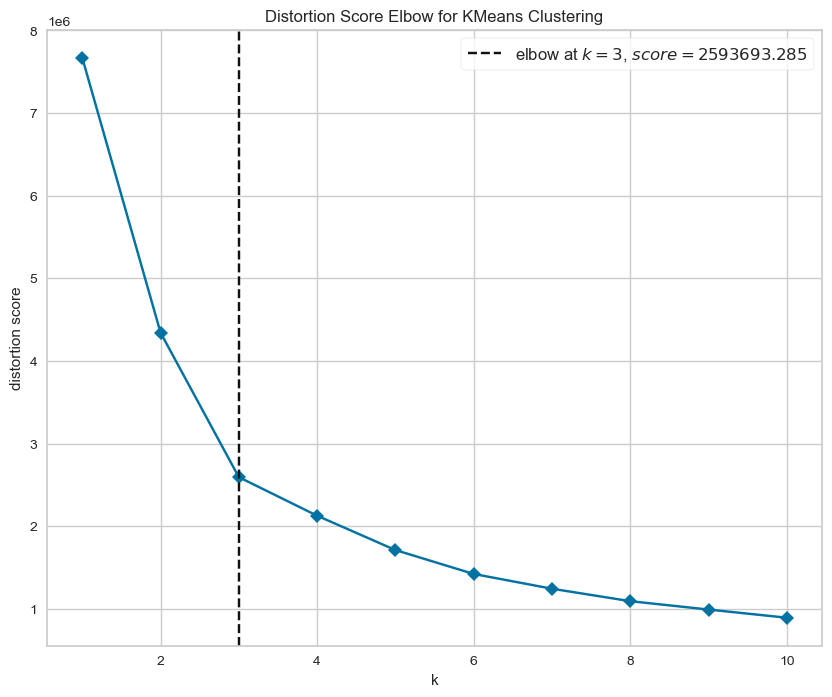

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Choosing the number of clusters

plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots()

model = KMeans(n_clusters=k, init='random', n_init=20, random_state=1773)

visualizer = KElbowVisualizer(model, k=(1,11), timings=False, ax=ax)
visualizer.fit(rep_mat)       
visualizer.ax.set_ylabel('Inertia')
visualizer.ax.set_title('The Elbow Method showing the optimal K');
visualizer.show()

This plot above implies that the cluster number should be chosen as 3.

In [36]:
dff = df[["TrafficCongestion"]]

model = KMeans(n_clusters=3, random_state = 1773)
model.fit(dff)

predictions = model.predict(dff)

dff["Cluster"] = predictions
dff

,TrafficCongestion,Cluster
15875558,0.114815,1
15875559,1.109195,1
15875560,0.304348,1
15875561,0.145161,1
15875562,0.087838,1
...,...,...
17399768,1.150000,1
17399769,0.106707,1
17399770,0.192029,1
17399771,0.003676,1


In [37]:
df["Cluster"] = dff["Cluster"]
data = df
df

,Day,Hour,Day_of_Week,LONGITUDE,LATITUDE,number_of_lanes_values,road_type_id,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,TrafficCongestion,Cluster
15875558,1,0,2,29.295044,40.877380,3.0,6.0,114,65,90,31,0.114815,1
15875559,1,0,2,29.371948,40.805969,2.0,17.0,145,45,87,193,1.109195,1
15875560,1,0,2,29.141235,41.020203,2.0,2.0,43,7,23,14,0.304348,1
15875561,1,0,2,28.558960,41.179504,4.0,2.0,144,59,93,54,0.145161,1
15875562,1,0,2,28.646851,41.009216,4.0,2.0,122,15,74,26,0.087838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17399768,29,23,2,29.031372,41.075134,2.0,2.0,61,4,30,69,1.150000,1
17399769,29,23,2,28.262329,41.113586,4.0,2.0,136,50,82,35,0.106707,1
17399770,29,23,2,28.218384,41.130066,4.0,2.0,137,40,69,53,0.192029,1
17399771,29,23,2,29.569702,41.157532,4.0,2.0,68,68,68,1,0.003676,1


# Visualization of Clusters

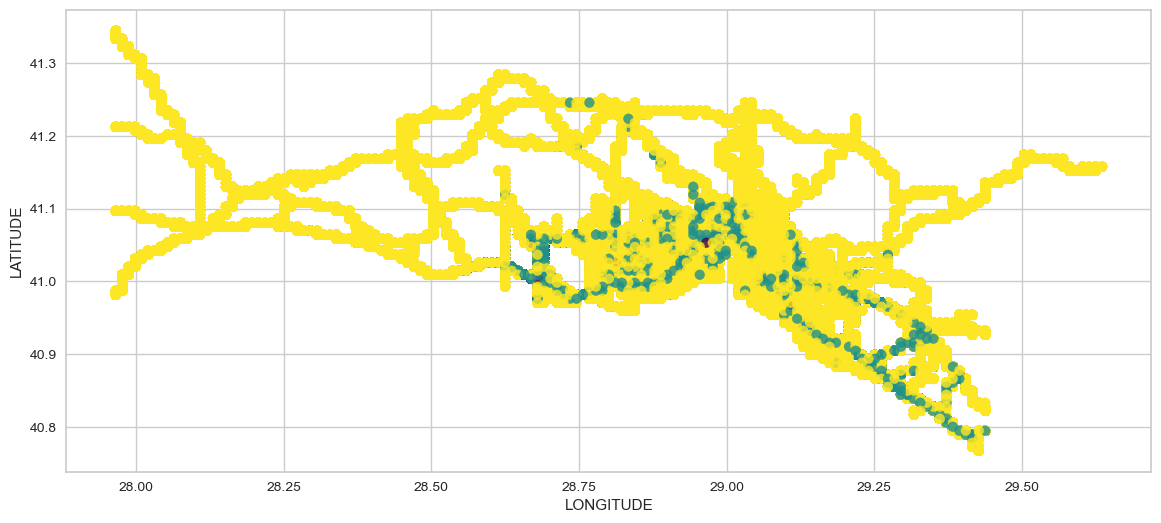

In [38]:
num_clusters = len(np.unique(predictions))

colors = plt.cm.viridis(np.linspace(1, 0, num_clusters))

original_color_cluster_0 = colors[0].copy()

colors[0] = colors[1]
colors[1] = original_color_cluster_0

plt.rcParams['figure.figsize'] = [14, 6]

plot1 = plt.scatter(data.LONGITUDE, data.LATITUDE, alpha=0.8, c=colors[predictions])
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

The map of clusters, above.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


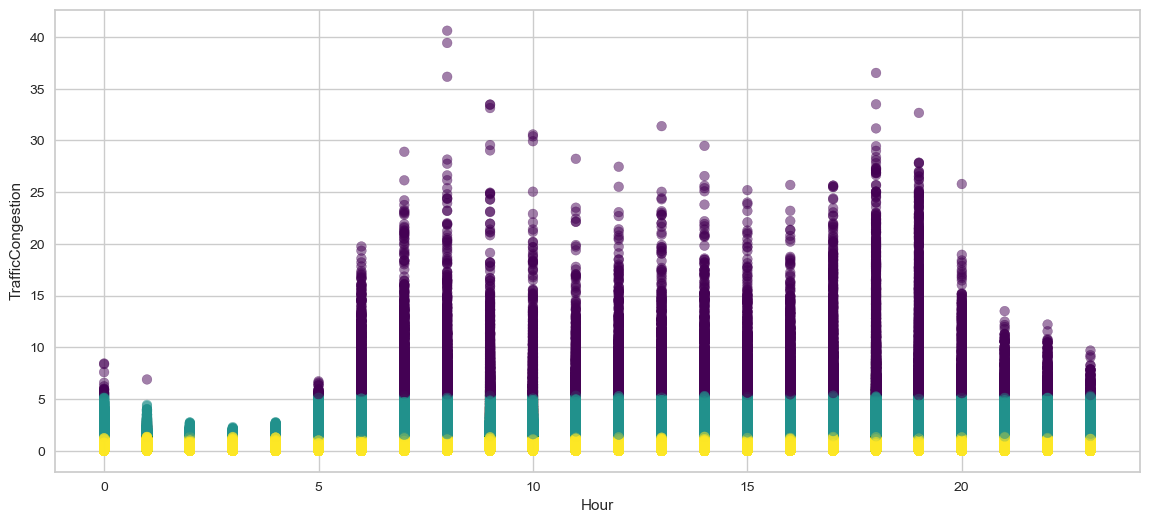

In [39]:
num_clusters = len(np.unique(predictions))
plot2 = plt.scatter(data.Hour, data.TrafficCongestion, alpha=0.5, c=colors[predictions])
plt.ylabel("TrafficCongestion")
plt.xlabel("Hour")
plt.legend()
plt.show()

Hourly predictions of the traffic congestion, above.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


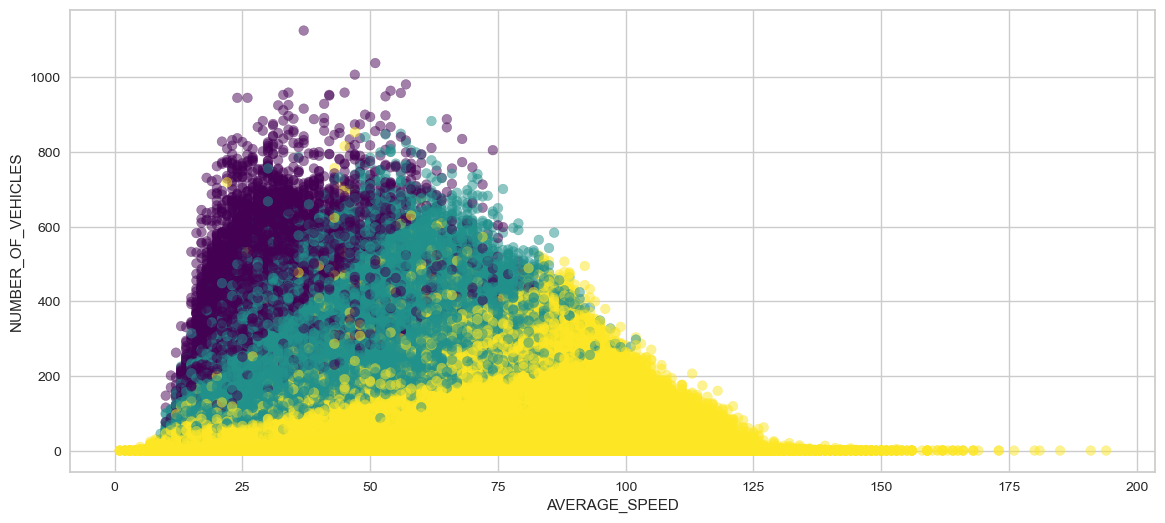

In [40]:
plot2 = plt.scatter(data.AVERAGE_SPEED, data.NUMBER_OF_VEHICLES, alpha=0.5, c=colors[predictions])
plt.ylabel("NUMBER_OF_VEHICLES")
plt.xlabel("AVERAGE_SPEED")
plt.legend()
plt.show()

Scatter plot of traffic congestion clustering by NUMBER_OF_VEHICLES and AVERAGE_SPEED, above.

## Radar Coordinates Mapping

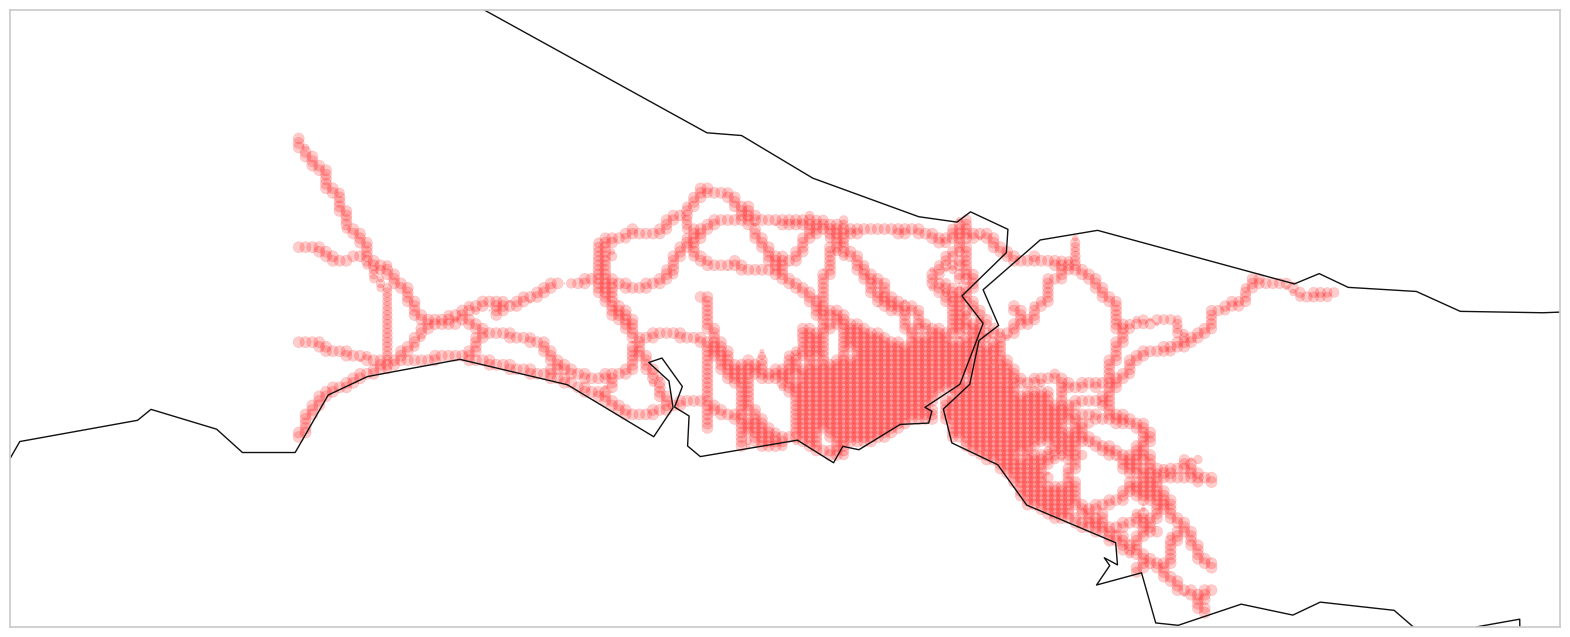

In [41]:
vehicles = data.groupby(['LONGITUDE', 'LATITUDE'])['Cluster'].count()

coords = vehicles.reset_index()
coords.columns = ['lat', 'lon', 'count']

fig = plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat = 40.75,
           urcrnrlat = 41.5,
           llcrnrlon = 27.5,
           urcrnrlon = 30.0,
           resolution='i')

m.drawcoastlines()
#m.drawlsmask(land_color='wheat', ocean_color='lightblue')

xs,ys = m(coords['lat'], coords['lon'])

m.scatter(xs, ys, s=vehicles/10, c='red', alpha=0.2)

plt.show()

The map of the radars, above.

## Weekday Mapping

We wanted to investigate weekdays and weekends separately because the traffic congestion differs depending on whether that particular day is on the weekends or weekdays. For example: On the weekend there is no commute in the early hours since very few people go to work on the weekends. The plots will explain everything. So, we first formed the weekdays.

In [42]:
df = df_merged[df_merged["Month"] == 11]
data["DATE_TIME"] = df['DATE_TIME']
weekday_df = data[data['Day_of_Week'].isin([0, 1, 2, 3, 4])]  

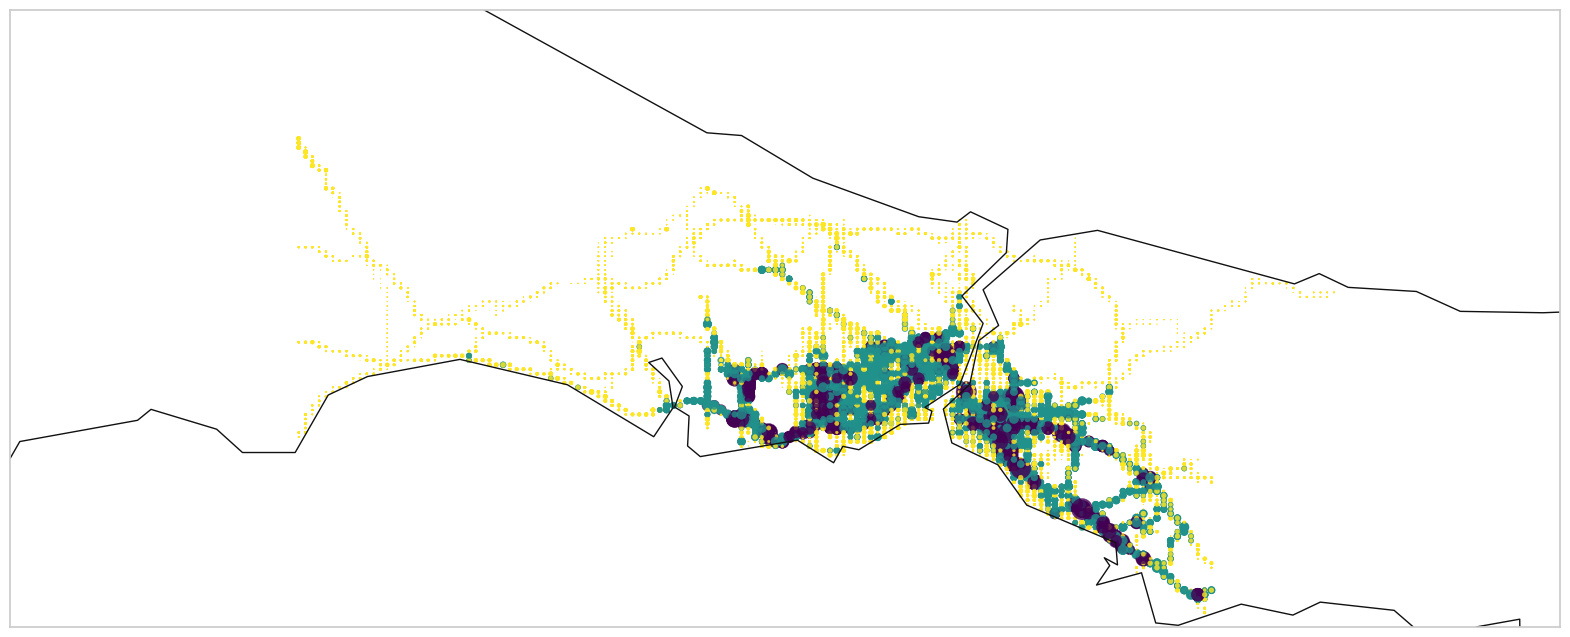

In [43]:
weekday_df['DATE_TIME'] = pd.to_datetime(weekday_df['DATE_TIME'])  

start_time1 = pd.to_datetime('07:00:00').time()
end_time1 = pd.to_datetime('08:00:00').time()

weekday_df['DATE_TIME'] = pd.to_datetime(weekday_df['DATE_TIME'])

selected_data1 = weekday_df[(weekday_df['DATE_TIME'].dt.time >= start_time1) & (weekday_df['DATE_TIME'].dt.time <= end_time1)]



fig = plt.figure(figsize=(20, 12))

m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()


xs, ys = m(selected_data1['LONGITUDE'].values, selected_data1['LATITUDE'].values)
sizes = np.array(selected_data1['TrafficCongestion'].values)
sizes = sizes*10
m.scatter(xs, ys, s=sizes, c=colors[selected_data1['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion during the hours between 07:00 and 08:00 on the weekdays, above.

To get some insights, the reader can compare the plot above and below. 

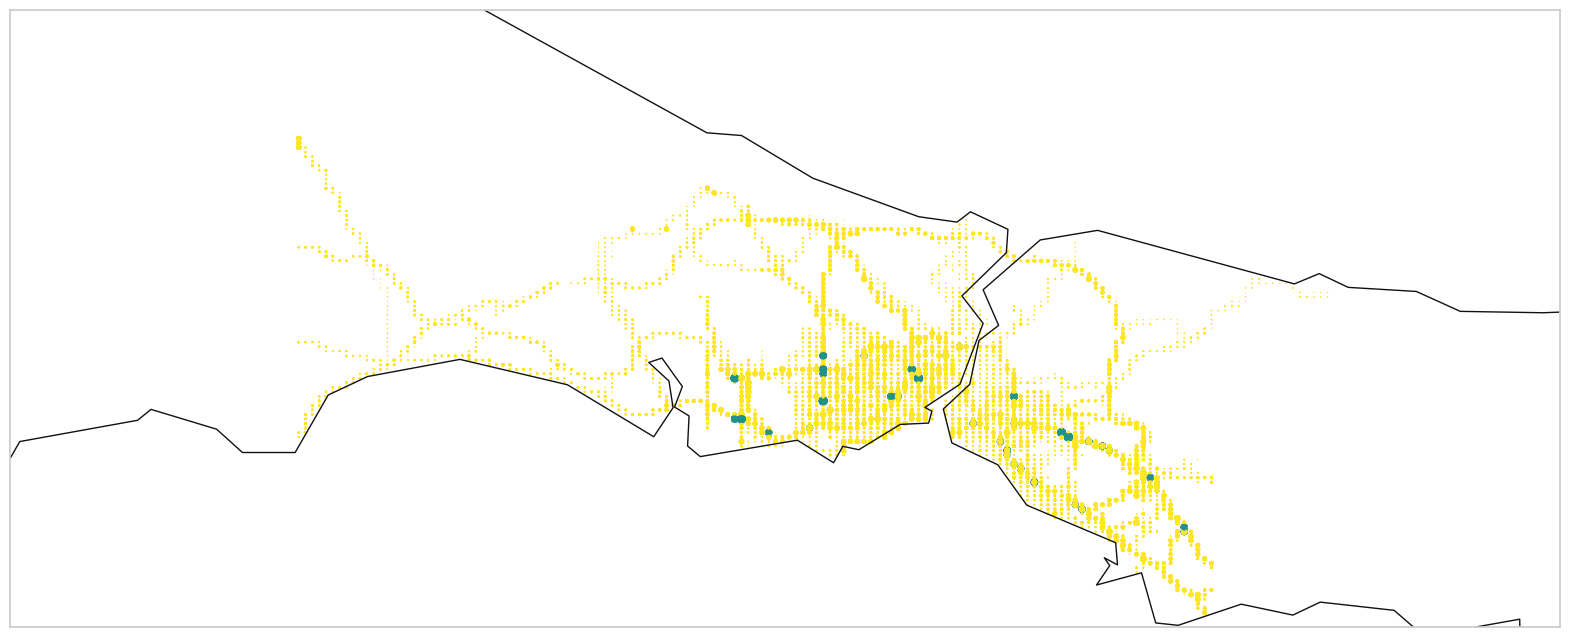

In [44]:
start_time2 = pd.to_datetime('03:00:00').time()
end_time2 = pd.to_datetime('04:00:00').time()

selected_data2 = weekday_df[(weekday_df['DATE_TIME'].dt.time >= start_time2) & (weekday_df['DATE_TIME'].dt.time <= end_time2)]

fig = plt.figure(figsize=(20, 12))
m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs1, ys1 = m(selected_data2['LONGITUDE'].values, selected_data2['LATITUDE'].values)
sizes1 = np.array(selected_data2['TrafficCongestion'].values)
sizes1 = sizes1*15

m.scatter(xs1, ys1, s=sizes1, c=colors[selected_data2['Cluster'].values], alpha=1)

plt.show()

The traffic congestion during the hours between 03:00 and 04:00 on the weekdays, above.

## Weekend Mapping

We created weekend data frame later.

In [45]:
df = df_merged[df_merged["Month"] == 11]
data["DATE_TIME"] = df['DATE_TIME']
weekend_df = data[data['Day_of_Week'].isin([5, 6])]  

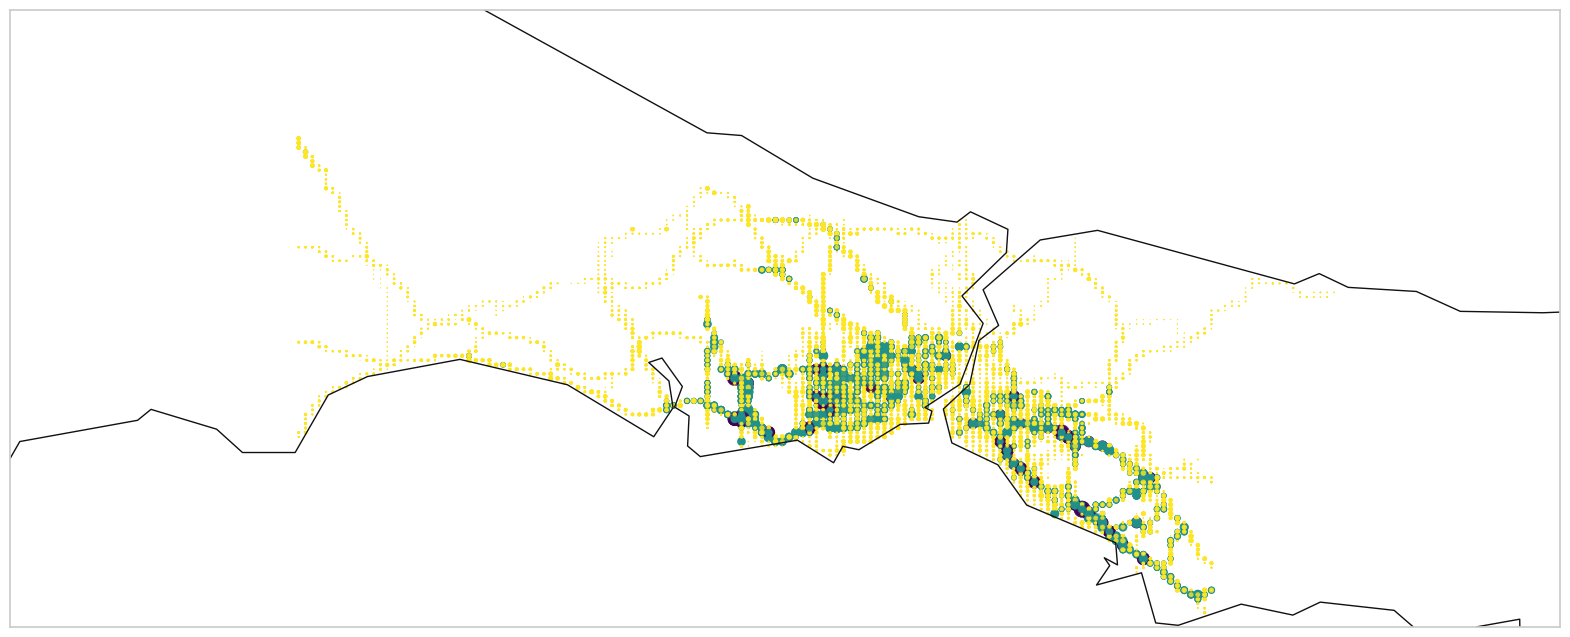

In [46]:
weekend_df['DATE_TIME'] = pd.to_datetime(weekend_df['DATE_TIME'])  

selected_data2 = weekend_df[(weekend_df['DATE_TIME'].dt.time >= start_time1) & (weekend_df['DATE_TIME'].dt.time <= end_time1)]

fig = plt.figure(figsize=(20, 12))

m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs2, ys2 = m(selected_data2['LONGITUDE'].values, selected_data2['LATITUDE'].values)
size2 = np.array(selected_data2['TrafficCongestion'].values)
size2 = size2*10

m.scatter(xs2, ys2, s=size2, c=colors[selected_data2['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion during the hours between 07:00 and 08:00 on the weekends, above. The reason why traffic congestion is higher early on the weekend than between 3:00 and 4:00 on weekdays is probably because there are people who work on the weekend and are still commuting.

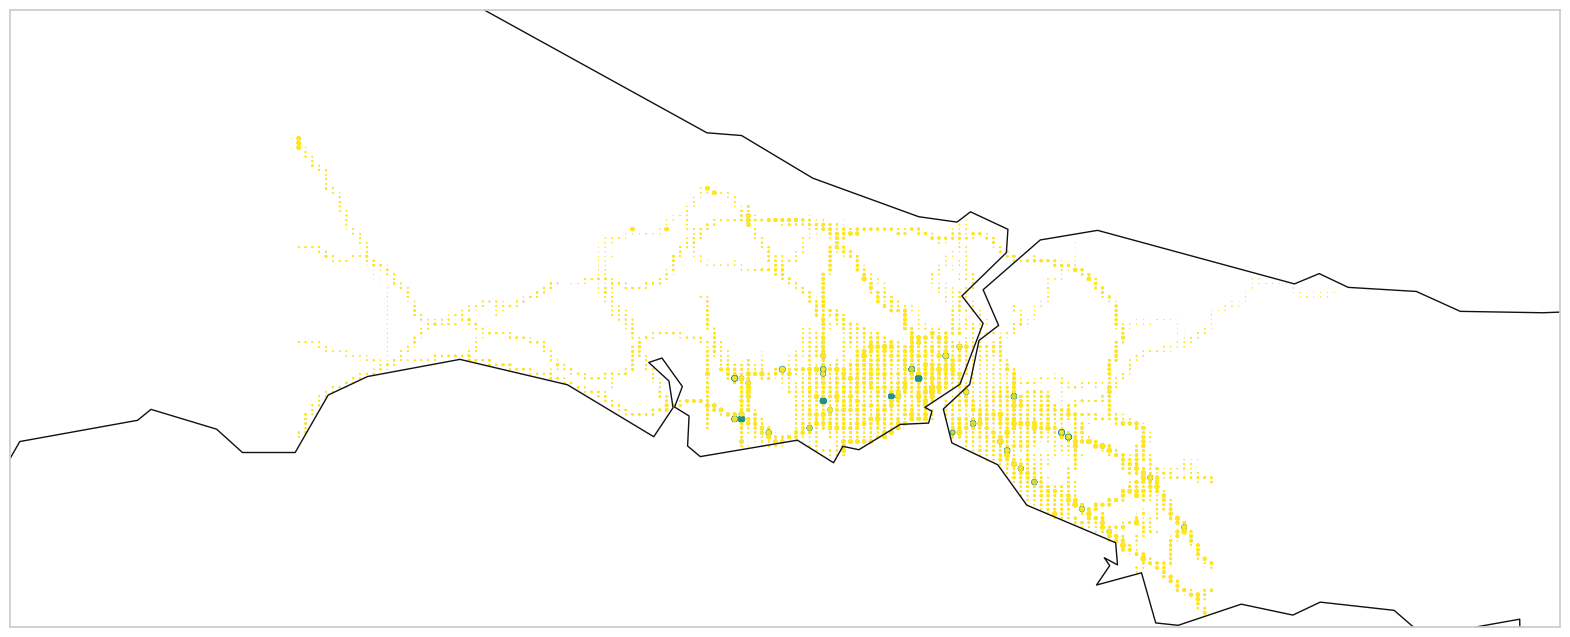

In [47]:
selected_data3  = weekend_df[(weekend_df['DATE_TIME'].dt.time >= start_time2) & (weekend_df['DATE_TIME'].dt.time <= end_time2)]

fig = plt.figure(figsize=(20, 12))
m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs3, ys3 = m(selected_data3['LONGITUDE'].values, selected_data3['LATITUDE'].values)
sizes3 = np.array(selected_data3['TrafficCongestion'].values)
sizes3 = sizes3*10

m.scatter(xs3, ys3, s=sizes3, c=colors[selected_data3['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion during the hours between 03:00 and 04:00 on the weekends, above. I actually expected that there would be more traffic jams on the weekend than during the same hours on weekdays because there are more people going out at night. 

## Mapping of Predictions

### Clustering of predictions

In [48]:
df_predicted["Month"] = df["Month"]
df_predicted = df_predicted[df_predicted["Month"] == 11]

data = df_predicted[["TrafficCongestion_Predictions"]]

model = KMeans(n_clusters=3, random_state = 1773)
model.fit(data)

predictions = model.predict(data)

df_predicted["Cluster"] = predictions
data = df_predicted
data

,LONGITUDE,LATITUDE,Day_of_Week,Day,Hour,road_type_id,number_of_lanes_values,TrafficCongestion_Predictions,Month,Cluster
15875558,29.295044,40.877380,2,1,0,6.0,3.0,0.512897,11.0,1
15875559,29.371948,40.805969,2,1,0,17.0,2.0,0.925259,11.0,0
15875560,29.141235,41.020203,2,1,0,2.0,2.0,0.625073,11.0,1
15875561,28.558960,41.179504,2,1,0,2.0,4.0,0.065012,11.0,1
15875562,28.646851,41.009216,2,1,0,2.0,4.0,0.243679,11.0,1
...,...,...,...,...,...,...,...,...,...,...
17399768,29.031372,41.075134,2,29,23,2.0,2.0,1.006044,11.0,0
17399769,28.262329,41.113586,2,29,23,2.0,4.0,0.113786,11.0,1
17399770,28.218384,41.130066,2,29,23,2.0,4.0,0.060298,11.0,1
17399771,29.569702,41.157532,2,29,23,2.0,4.0,0.019457,11.0,1


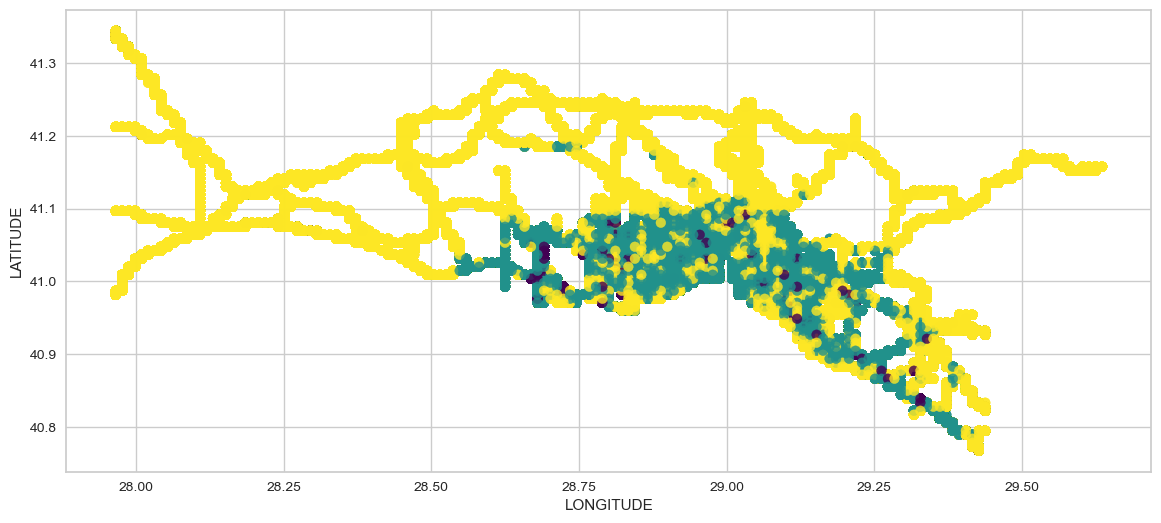

In [57]:
num_clusters = len(np.unique(predictions))

colors = plt.cm.viridis(np.linspace(1, 0, num_clusters))

original_color_cluster_0 = colors[0].copy()

colors[0] = colors[1]
colors[1] = original_color_cluster_0

plt.rcParams['figure.figsize'] = [14, 6]

plot1 = plt.scatter(data.LONGITUDE, data.LATITUDE, alpha=0.8, c=colors[predictions])
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

The traffic congestion predictions during the hours between 07:00 and 08:00 on the weekdays, above.

## Weekday Mapping of Predictions

In [58]:
df = df_merged[df_merged["Month"] == 11]
data["DATE_TIME"] = df['DATE_TIME']
weekday_df = data[data['Day_of_Week'].isin([0, 1, 2, 3, 4])]  

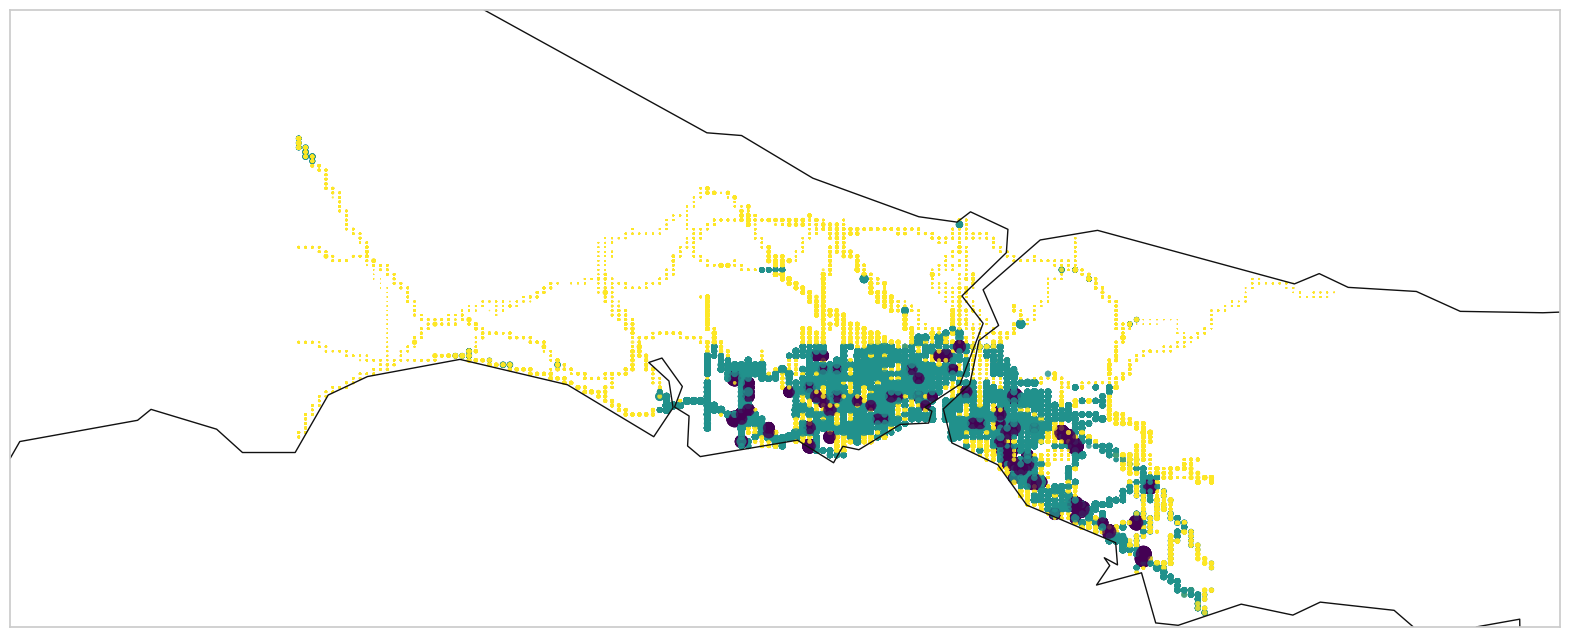

In [59]:
weekday_df['DATE_TIME'] = pd.to_datetime(weekday_df['DATE_TIME'])  

start_time1 = pd.to_datetime('07:00:00').time()
end_time1 = pd.to_datetime('08:00:00').time()

weekday_df['DATE_TIME'] = pd.to_datetime(weekday_df['DATE_TIME'])

selected_data1 = weekday_df[(weekday_df['DATE_TIME'].dt.time >= start_time1) & (weekday_df['DATE_TIME'].dt.time <= end_time1)]



fig = plt.figure(figsize=(20, 12))

m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()


xs, ys = m(selected_data1['LONGITUDE'].values, selected_data1['LATITUDE'].values)
sizes = np.array(selected_data1['TrafficCongestion_Predictions'].values)
sizes = sizes*15
m.scatter(xs, ys, s=sizes, c=colors[selected_data1['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion predictions during the hours between 07:00 and 08:00 on the weekdays, above.

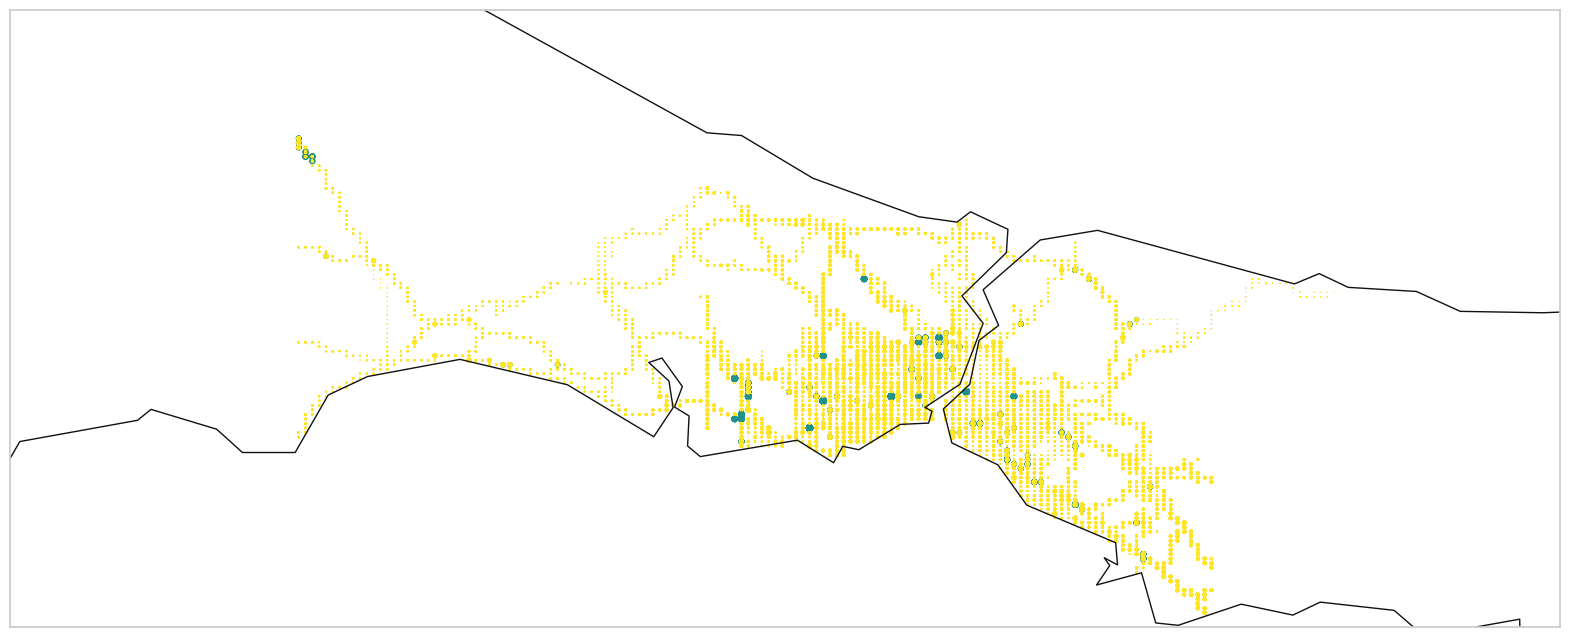

In [60]:
start_time2 = pd.to_datetime('03:00:00').time()
end_time2 = pd.to_datetime('04:00:00').time()

selected_data2 = weekday_df[(weekday_df['DATE_TIME'].dt.time >= start_time2) & (weekday_df['DATE_TIME'].dt.time <= end_time2)]

fig = plt.figure(figsize=(20, 12))
m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs1, ys1 = m(selected_data2['LONGITUDE'].values, selected_data2['LATITUDE'].values)
sizes1 = np.array(selected_data2['TrafficCongestion_Predictions'].values)
sizes1 = sizes1*15

m.scatter(xs1, ys1, s=sizes1, c=colors[selected_data2['Cluster'].values], alpha=1)

plt.show()

The traffic congestion predictions during the hours between 03:00 and 04:00 on the weekdays, above.

## Weekend Mapping of Predictions

In [61]:
df = df_merged[df_merged["Month"] == 11]
data["DATE_TIME"] = df['DATE_TIME']
weekend_df = data[data['Day_of_Week'].isin([5, 6])]  

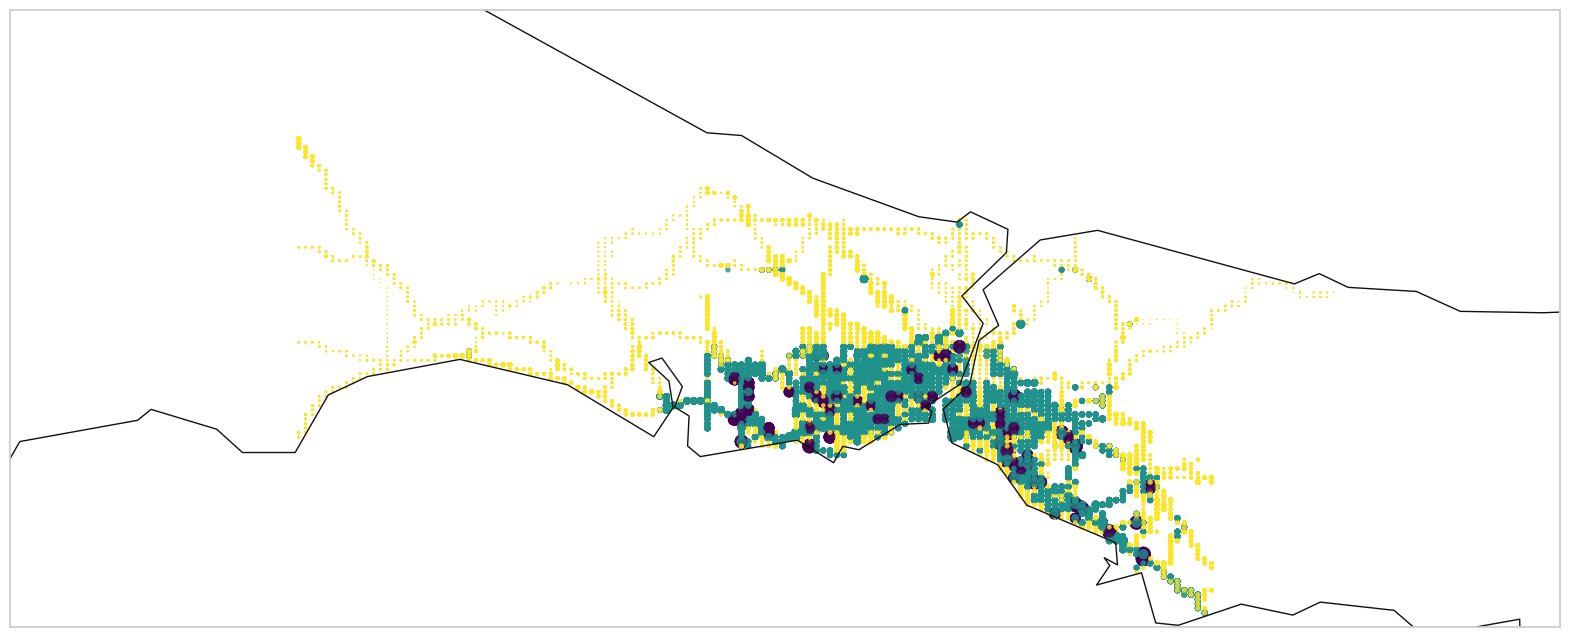

In [62]:
weekend_df['DATE_TIME'] = pd.to_datetime(weekend_df['DATE_TIME'])  

selected_data2 = weekend_df[(weekend_df['DATE_TIME'].dt.time >= start_time1) & (weekend_df['DATE_TIME'].dt.time <= end_time1)]

fig = plt.figure(figsize=(20, 12))

m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs2, ys2 = m(selected_data2['LONGITUDE'].values, selected_data2['LATITUDE'].values)
size2 = np.array(selected_data2['TrafficCongestion_Predictions'].values)
size2 = size2*15

m.scatter(xs2, ys2, s=size2, c=colors[selected_data2['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion predictions during the hours between 07:00 and 08:00 on the weekends, above.

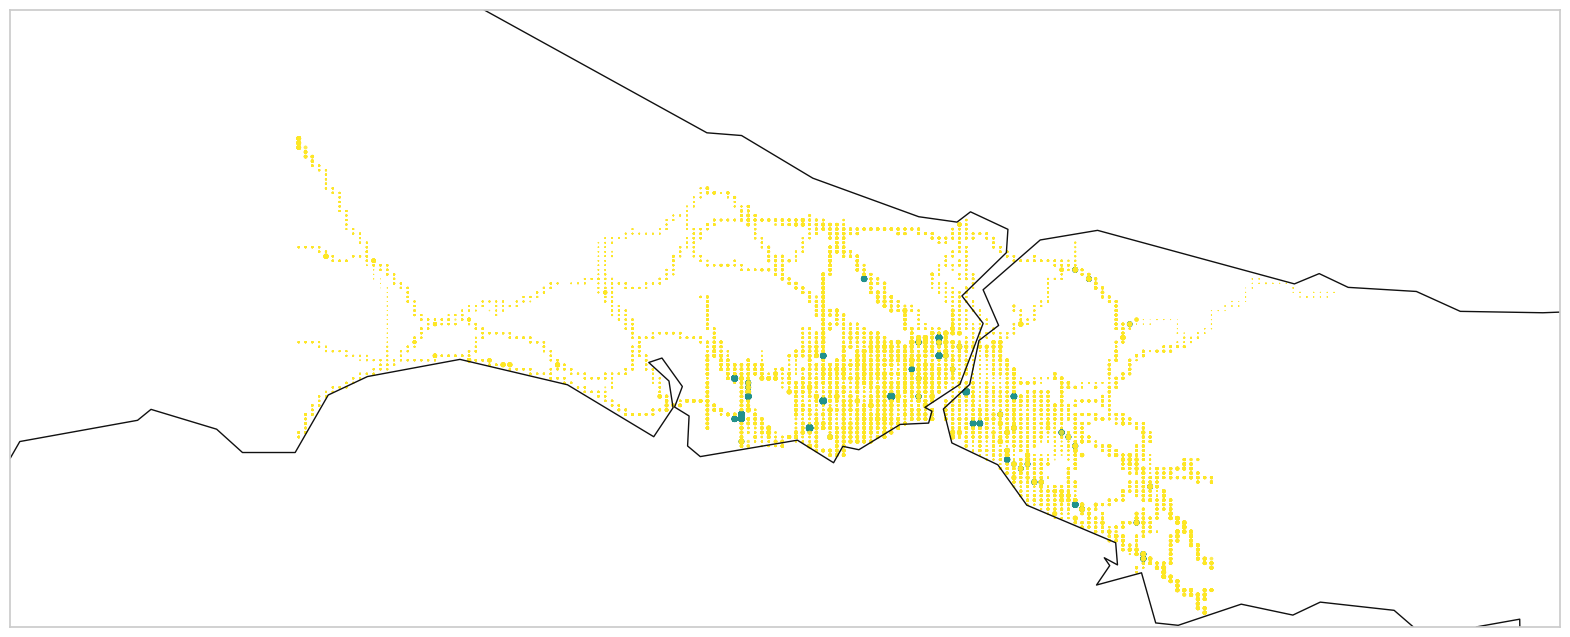

In [63]:
selected_data3  = weekend_df[(weekend_df['DATE_TIME'].dt.time >= start_time2) & (weekend_df['DATE_TIME'].dt.time <= end_time2)]

fig = plt.figure(figsize=(20, 12))
m = Basemap(projection='merc',
            llcrnrlat=40.75,
            urcrnrlat=41.5,
            llcrnrlon=27.5,
            urcrnrlon=30.0,
            resolution='i')
m.drawcoastlines()

xs3, ys3 = m(selected_data3['LONGITUDE'].values, selected_data3['LATITUDE'].values)
sizes3 = np.array(selected_data3['TrafficCongestion_Predictions'].values)
sizes3 = sizes3*15

m.scatter(xs3, ys3, s=sizes3, c=colors[selected_data3['Cluster'].values], alpha=0.8)

plt.show()

The traffic congestion predictions during the hours between 03:00 and 04:00 on the weekdends, above.

## Visualization of TrafficCongestion by Hours

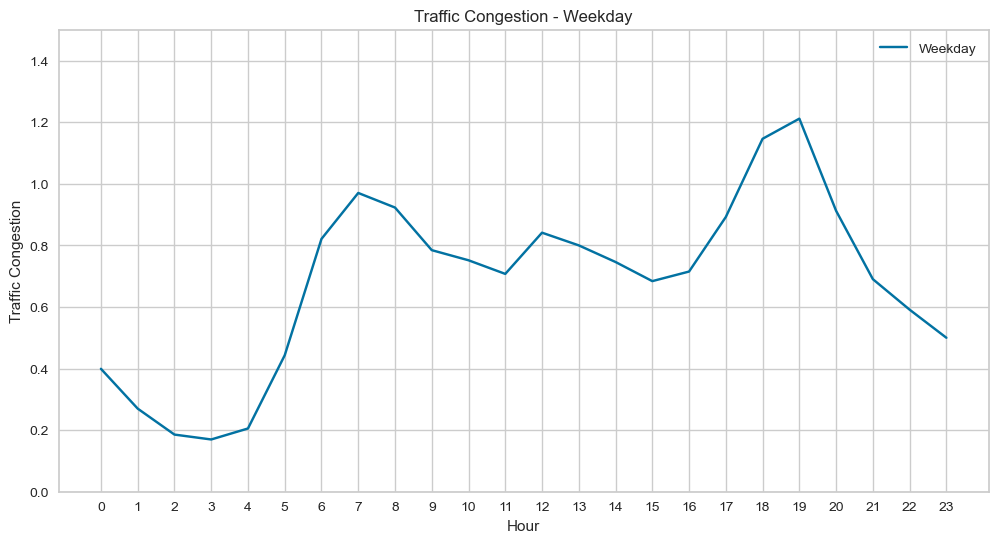

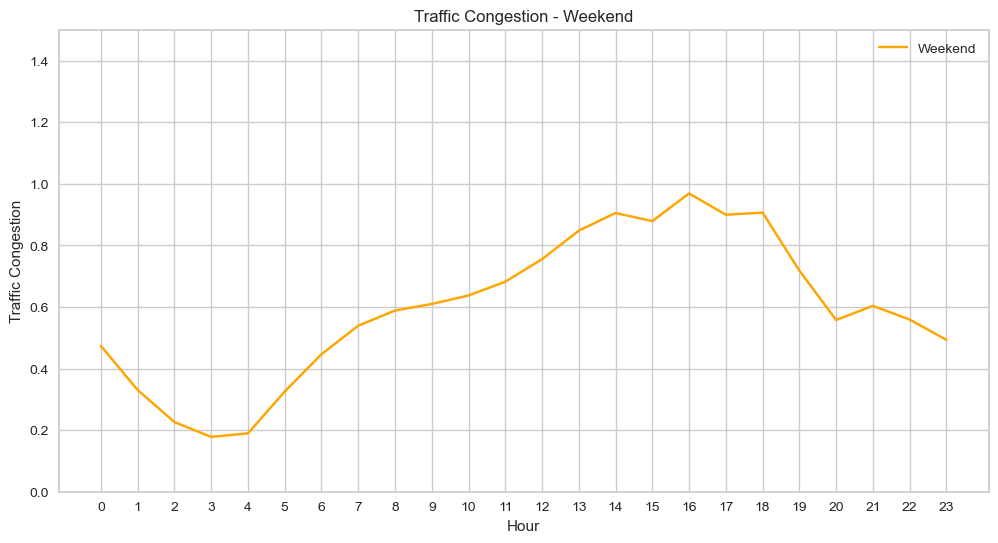

In [64]:
weekday_df = df[df['Day_of_Week'].isin([0, 1, 2, 3, 4])]  
weekend_df = df[df['Day_of_Week'].isin([5, 6])]  

weekday = weekday_df[["Day", "Hour", "Day_of_Week", "LONGITUDE", "LATITUDE", "AVERAGE_SPEED", "NUMBER_OF_VEHICLES", "number_of_lanes"]]
weekend = weekend_df[["Day", "Hour", "Day_of_Week", "LONGITUDE", "LATITUDE", "AVERAGE_SPEED", "NUMBER_OF_VEHICLES", "number_of_lanes"]] 

weekday_df["TrafficCongestion"] = weekday_df["NUMBER_OF_VEHICLES"]/(df["number_of_lanes_values"]*weekday_df["AVERAGE_SPEED"])
weekend_df["TrafficCongestion"] = weekend_df["NUMBER_OF_VEHICLES"]/(df["number_of_lanes_values"]*weekend_df["AVERAGE_SPEED"])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TrafficCongestion', data=weekday_df, ci=None, label='Weekday')
plt.title('Traffic Congestion - Weekday')
plt.xlabel('Hour')
plt.ylabel('Traffic Congestion')
plt.legend()
plt.ylim(0, 1.5)
plt.xticks(range(0, 24, 1))
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TrafficCongestion', data=weekend_df, ci=None, label='Weekend', color='orange')
plt.title('Traffic Congestion - Weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic Congestion')
plt.legend()
plt.ylim(0, 1.5)
plt.xticks(range(0, 24, 1))
plt.show()

This obviously aligns with our intuition because the first graph implies that the traffic jams reach their maximums at the actual peak hours of the traffic we know of -Hours of going to work and leaving from work- and weekdays seem to have sharp edges at those hours while the weekends have quite high numbers in traffic congestions at the same hours, but they do not have slopes like the weekdays do. 

## Results

With the ambitious objective of forecasting and visualizing traffic congestion, this project focused on not only forecasting traffic patterns but also effectively segmenting them into discrete clusters and mapping them. The time series nature of the data made this project more difficult because it required specific methods for handling and analyzing data. Thorough data scrapping, editing, and pre-processing were all part of my approach to get the dataset ready for analysis.


We investigated two predictive models, evaluating each one's effectiveness in light of the particular requirements of time series data. These models included RandomForestRegressor and DecisionTreeRegressor. In the end, the RandomForestRegressor was chosen with % 0.5596047256830344 on test data because of how well it handled the complexity of the data. The method included investigating different machine learning approaches as well as feature importance assessments. Although we cannot say that DecisionTreeRegressor did a terrible job either. They were quite close in performing. 

Functional PCA and functional clustering would have been better approaches given the time series nature of our data. Because these methods are specifically made for time series analysis, it is possible to comprehend temporal patterns and trends in data with greater nuance. The depth and precision of the analysis may have been improved by using functional clustering in particular, which could have offered a more precise segmentation of traffic patterns based on their temporal properties.
The successful implementation of RandomForestRegressor, enhanced by PCA and clustering algorithms to show traffic congestion in a more useful way, would have marked the project's climax. 

## Conclusion

We first began by pre-processing, modifying, and scraping data. This was an important stage because the success of the analysis that followed was directly impacted by the quality and structure of the data. We made sure the dataset was precise, clean, and appropriate for time series analysis by carefully preparing it.





After the data was ready, we focused on predictive modeling, which is the main objective of my study. We looked into two models, decision tree regression, and random forest regression. Finding a model that could effectively handle the temporal characteristics of the traffic data was my goal. We chose the RandomForestRegressor after doing extensive testing and analysis since it performs better at handling the complexity of time series data.



We understood that specific analytical methods were required due to the data's unique characteristics. Taking this into account, we gave functional clustering and functional PCA some thought. These techniques provide a more thorough examination of patterns and trends throughout time, making them especially appropriate for time series data. However, because of my lack of knowledge and the fact that it is out of the scope of this course, we mostly concentrated on traditional PCA and clustering techniques. Even so, these methods gave me insightful information that let me divide traffic patterns into discrete groups for easier analysis and visualization.


We performed a feature importance analysis in order to improve my study even more. This stage was essential to comprehending the different aspects affecting traffic congestion. We kept specific features even though feature importance results advised otherwise. We used those features in visualizing.  

Lastly, we used the model we had selected to forecast traffic congestion, and we used a variety of mapping methods to illustrate my forecasts. This provided a thorough picture of the traffic situation at various times and days by mapping both the actual traffic data and the clustered projections To sum up, my project contained a number of methodical and strategic steps, that built on one another to give a complete grasp of traffic patterns. We made an effort to capture the complex aspects of traffic congestion, taking into account the time series features of the data, from data preparation to complex predictive modeling and visualization. 

## References

The datasets are from Ibbveri: https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set, https://data.ibb.gov.tr/dataset/ana-arter-veri-seti

Lecture Notes, Week 13. Clustering methods. K-means algorithm and Week 14. Hierarchical clustering, DBSCAN by Gül İnan